# Chapter 12 -- Additional Data Handling

## Topics Covered:

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Sort-and-Sort-Sequences">Sort and Sort Sequences</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Drop/Keep-Columns">Drop/Keep Columns</a> 

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Rename-Columns">Rename Columns</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Finding-Duplicate-Values">Find Duplicate Values</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Extract-Duplicate-Values">Extract Duplicate Rows to a new DataFrame</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Drop-Duplicate-Rows">Drop Duplicate Rows</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Add-a-New-DataFrame-Column">Add a New DataFrame Column</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Cast-Strings-to-Floats">Cast Strings to Float</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Concatenating-DataFrames-(Join)">Concatenating DataFrames (Join)</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Crosstabs">Crosstabs</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Sampling">Sampling</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Binning-Continuous-Values">Binning Continuous Values</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Save-to-Disk">Save to Disk</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Resources">Resources</a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Index
from IPython.display import Image

## Sort and Sort Sequences

The example below is used in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Time-Series-Walk-Through">Time Series Walk-Through</a> in Chapter 09 -- Panda Time Series and Date Handling.  It uses the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2011%20--%20Panda%20Readers.ipynb#pd.read_csv(URL)-method"> read_csv() method</a> to construct the 'df_us' DataFrame begining its read on row 3,082.

In [2]:
df_states = pd.read_csv("C:\Data\\HPI_master.csv",                 
            skiprows=3082,
            usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8),
            names=('hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name', 'place_id', 'yr', 'period', 'index_nsa'),
            header=None)

The following SAS Data Step reads the same .csv file using FIRSTOBS= to begin reading from an arbitary row position.

````
    /********************************/
    /* c09_read()_csv_df_states.sas */
    /********************************/
    data df_states;
          infile 'C:\Data\HPI_master.csv' delimiter=',' missover dsd firstobs=3081; 
          informat hpi_type $12.
                   hpi_flavor $16.
                   frequency $9.
                   level $28.
                   place_name $33.
                   place_id $8.
                   yr $5.
                   period $6.
                   index_nsa 8.;
             input hpi_type $
                   hpi_flavor $
                   frequency $
                   level $
                   place_name $
                   place_id $
                   yr $
                   period $
                   index_nsa ;
````

Verify the read using the .shape attribute.

In [3]:
df_states.shape

(96244, 9)

Inspect the first 5 rows of the 'df_states' DataFrame.

In [4]:
df_states.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
0,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,4,94.95
1,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,1,100.91
2,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,2,100.76
3,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,3,94.02
4,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,4,91.43


Inspect the first 5 rows of the SAS data set df_states.

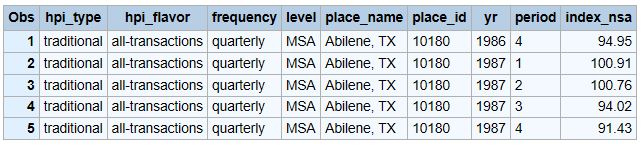

In [5]:
Image(filename='Anaconda3\\output\\df_states_output.JPG')  

Exam the default sort by supplying the the sort key as the minimum argument to the .sort_values() attribute.  The sort operation creates the new 'default_srt' DataFrame.

In [6]:
default_srt = df_states.sort_values('index_nsa')

Display the first 4 rows of the sorted DataFrame 'default_srt'

In [7]:
default_srt.iloc[0:4]

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
42692,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,1975,3,18.31
42856,traditional,all-transactions,quarterly,MSA,"San Jose-Sunnyvale-Santa Clara, CA",41940,1975,4,18.82
48737,traditional,all-transactions,quarterly,MSA,"Honolulu ('Urban Honolulu'), HI",46520,1981,4,18.91
42693,traditional,all-transactions,quarterly,MSA,San Francisco-Redwood City-South San Francisco...,41884,1975,4,19.26


By examing the first the first four rows of the sorted DataFrame, 'default_srt' we see the default sort sequence is ascending.  Of course, by reading the doc for <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html"> pandas.DataFrame.sort_values </a> we could 'see' this as well. 

The default SAS sort syntax is:

````
    /******************************************************/
    /* c12_print_first4_rows_sorted.sas                   */
    /******************************************************/
84  proc sort data=df_states;
85      by index_nsa;
NOTE: 96244 observations were read from "WORK.df_states"
NOTE: Data set "WORK.df_states" has 96244 observation(s) and 9 variable(s)
86         
87   proc print data=df_states (obs=4);
````

Like panda the default SAS sort sequence is ascending.  This is confirmed by the SAS doc located <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#sort-overview.htm"> here </a>.

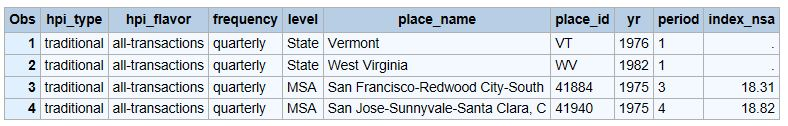

In [8]:
Image(filename='Anaconda3\\output\\default_first_four.JPG')  

In contrast to the panda default sort the default SAS sort sequence places its missing values first in the data set as illustrated above.

Displaying the last 4 rows in the 'default_srt' DataFrame finds the 2 NaN's sorted last since this is the default location panda places its missing values.

In [9]:
default_srt.tail(4)  

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
54262,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,1,780.98
54263,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,2,791.71
60576,traditional,all-transactions,quarterly,State,Vermont,VT,1976,1,NaN
61098,traditional,all-transactions,quarterly,State,West Virginia,WV,1982,1,NaN


panda's default sort sequence places NaN's last in the sort sequence by default and can be used as an alternative to <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators">boolean operators and the .loc() method</a> to detect missing values.

The SAS program to access the last four observations in the data set is:

````
    /******************************************************/
    /* c12_print_last4_rows_sorted.sas                    */
    /******************************************************/
    79         data last4;  
    80           set df_states (firstobs=96241);
    81           by index_nsa;

    NOTE: 4 observations were read from "WORK.last4"
````    

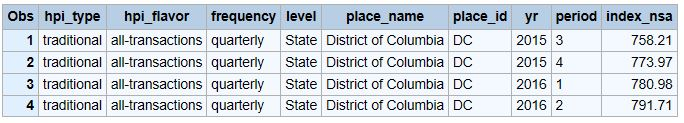

In [10]:
Image(filename='Anaconda3\\output\\sort_last_four.JPG')  

Alter the organization of the 'states_desc' DataFrame by supplying arguments and values to the sort_values() attribute.  The example below sorts descending placeing missing values at the beginning of the DataFrame.

In [11]:
states_desc = df_states.sort_values('index_nsa', ascending=False, na_position='first')

Setting the na_position= argument to 'first' places NaN's at the beginning of the sort sequence.  This is the same beavhior for SAS' sort sequence.  Details describing SAS sort order for missing values is descried <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p0tmoipp0ci6wkn0z27ev47sv0ov.htm"> here </a>.

The first two rows in the DataFrame 'states_desc' contain the NaN's values for the 'index_nsa' column, while the next 2 rows contain the highest values.

In [12]:
states_desc.iloc[0:4,]

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
60576,traditional,all-transactions,quarterly,State,Vermont,VT,1976,1,NaN
61098,traditional,all-transactions,quarterly,State,West Virginia,WV,1982,1,NaN
54263,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,2,791.71
54262,traditional,all-transactions,quarterly,State,District of Columbia,DC,2016,1,780.98


SAS has missing 28 missing value indicators for numerics described <a href="http://support.sas.com/documentation/cdl/en/lrcon/68089/HTML/default/viewer.htm#p175x77t7k6kggn1io94yedqagl3.htm"> here </a>.  However, if you want missing values to be 'first' in a data set using an ascending sort sequence, then the missing value indicator must be an actual numeric value larger than the largest non-missing value.  In other words, by default, the SAS missing value indicator for numerics is always the smallest numeric value.

The SAS example below sorts the df_states data set in descending order by the 'index_nsa' variable.  Like the panda example above, the 

    out=states_srt2
    
syntax creates the new SAS data set 'states_srt2'. 

````
    /******************************************************/
    /* c12_print_last4_rows_sorted_descending.sas        */
    /*****************************************************/
    44        proc sort data=df_states
    45           out=states_srt2;
    46           by descending index_nsa;
    NOTE: 96244 observations were read from "WORK.df_states"
    NOTE: Data set "WORK.states_srt2" has 96244 observation(s) and 9 variable(s)
    47        
    48         data first4;
    49           set states_srt2 (obs=4);
    50           by descending index_nsa;
````

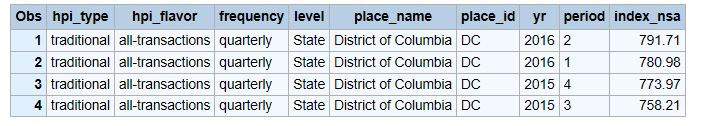

In [13]:
Image(filename='Anaconda3\\output\\sort_last4_descending.JPG')  

The section below examines a number of common data management patterns for analysis. 

####    1. Read the Lending Club Loan Status file.

In [14]:
lc = pd.read_csv("C:\\Data\\LC_Loan_Stats.csv",
                 low_memory=False)     
lc.shape

(42633, 51)

Check for <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Identification">missing values</a>.  Clearly, some columns are not useful.

In [15]:
lc.isnull().sum()

ID                                 2
Member_ID                          3
Loan_Amnt                          3
Term                               3
Int_Rate                           3
Installment                        3
Grade                              3
Sub_Grade                          3
Emp_Length                         3
Home_Ownership                     3
Annual_Inc                         7
Verification_Status                3
Loan_Status                        3
Purpose                            3
Zip_Code                           3
Addr_State                         3
DTI                                3
Delinq_2yrs                       32
Earliest_Cr_Line                  32
Inq_Last_6mths                    32
Mths_Since_Last_Delinq         26998
Mths_Since_Last_Record         38978
Open_Acc                          32
Pub_Rec                           32
Revol_Bal                          3
Revol_Util                        93
Total_Acc                         32
I

## Drop/Keep Columns

Keep some of the columns in the 'lc' DataFrame.

In [16]:
lc = lc[['ID', 'Member_ID', 'Loan_Amnt', 'Term', 'Int_Rate', 'Installment', 'Grade', 'Sub_Grade', 'Emp_Length',
                     'Home_Ownership', 'Annual_Inc', 'Verification_Status', 'Loan_Status', 'Purpose', 'Zip_Code',
                     'Addr_State', 'DTI', 'Delinq_2yrs', 'Earliest_Cr_Line', 'Inq_Last_6mths', 'Open_Acc', 'Revol_Bal',                          
                     'Revol_Util']]

## Rename Columns

In [17]:
lc = lc.rename(columns = {
           'Member_ID'              :'mem_id',
           'Loan_Amtn'              :'ln_amt',
           'Int_Rate'               :'rate',
           'Home_Ownership'         :'own_rnt',
           'Verification_Status'    :'vrfy_stat',
           'Loan_Status'            :'ln_stat',
           'Addr_State'             :'state',
           'Earliest_Cr_Line'       :'earliest_ln'
    })

Lower-case all the 'lc' DataFrame column names.

In [18]:
lc.columns = map(str.lower, lc.columns)

An investigation of the LC_Loan_Stats.csv file reveals it has 2 parts.  The first part, rows 0 to 39786 contain data for those loans meeting their credit policies.  Rows 39790 to the end contain data for those loans that are outside their normal lending policies.  

Create the 'lc1' DataFrame by reading a sub-set of columns and rows. 

In [19]:
lc1 = pd.read_csv("C:\\Data\\LC_Loan_Stats.csv", 
          low_memory=False,            
          usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 22, 24, 25),
          names=('id','mem_id', 'ln_amt', 'term','rate', 'm_pay', 'grade', 'sub_grd', 'emp_len',
                 'own_rnt', 'income', 'ln_stat', 'purpose', 'state', 'dti', 'delinq_2yrs', 'ln_fst',
                'inq_6mnth', 'open_acc', 'revol_bal', 'revol_util' ),
          skiprows=1,
          nrows=39786,
          header=None)
lc1.shape

(39786, 21)

The analog SAS program for reading sub-sets of rows and columns from the 'LC_Loan_Stats.csv' file.

````
    /******************************************************/
    /* c12_read_1st_half_loan_cvs.sas                     */
    /******************************************************/
    4         options obs=39787;
    5         proc import datafile="c:\data\LC_Loan_Stats.csv"
    6              dbms=csv
    7              out=loans
    8              replace;
    9
    10          data lc1(rename=(Member_ID     = mem_id
    12                        Loan_Amnt        = ln_amt
    13                        Int_Rate         = rate
    14                        Installment      = m_pay
    15                        Sub_Grade        = sub_grd
    16                        Emp_Length       = emp_len
    17                        Home_Ownership   = own_rnt
    18                        Annual_Inc       = income
    19                        Loan_Status      = ln_stat
    20                        Addr_State       = state
    21                        Earliest_Cr_Line = ln_fst
    22                        Inq_Last_6mths   = inq_6mnth));
    23       
    24         set loans(keep =  ID
    25                           Member_ID
    26                           Loan_Amnt
    27                           Term
    28                           Int_Rate
    29                           Installment
    30                           Grade
    31                           Sub_Grade
    32                           Emp_Length
    33                           Home_Ownership
    34                           Annual_Inc
    35                           Loan_Status
    36                           Purpose
    37                           Addr_State
    38                           DTI
    39                           Delinq_2yrs
    40                           Earliest_Cr_Line
    41                           Inq_Last_6mths
    42                           Open_Acc
    43                           Revol_Bal
    44                           Revol_Util);
    45
    46        ln_plcy = 'True';

    NOTE: 39786 observations were read from "WORK.loans"
    NOTE: Data set "WORK.lc1" has 39786 observation(s) and 22 variable(s)
````

## Find Duplicate Values

In the 'lc1' DataFrame we expect to find no duplicate id values.  Setting the .duplicated attribute to False returns all of the duplicate values, in our case for the lc1['id'] column.  The .duplicated() attribute for DataFrames is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html"> here</a>.

False marks all duplicate values as True.  Create the new 'lc1_dups' DataFrame containing the duplicates for the lc1['id'] column.  If its length is zero then there are no duplicates.  Locating the duplicate rows is not the same as removing then which is illustrated below.

Begin by setting the index to the lc1['id'] column.  Next, 
create a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> Boolean mask</a> locating the duplicate values for the lc1['id'] column.  The keep='first' argument behaves similiar to SAS FIRST.variable in BY-Group processing.  We want to ignore the first occurance of the **duplicate** 'index' column value and extract the remaining ones.

In [20]:
lc1.set_index('id', inplace=True, drop=False)
dup_mask = lc1.duplicated('id', keep='first')

## Extract Duplicate Values

Apply the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> Boolean mask using the .loc attribute</a> to create the new 'lc1_dups' DataFrame.  The .shape attribute shows there are 35 rows with duplicate 'id' values.

In [21]:
lc1_dups = lc1.loc[dup_mask]
lc1_dups.shape

(35, 21)

The SAS SORT option <a href="https://support.sas.com/documentation/cdl/en/proc/61895/HTML/default/viewer.htm#a000146878.htm"> NODUPKEY</a> checks for and eliminates observations with duplicate BY values.  The DUPOUT= option names the target SAS data set to write the duplicates.

````
    /******************************************************/
    /* c12_sort_nodupkey.sas                              */
    /******************************************************/
    50       proc sort data = lc1 dupout=lc1_dups nodupkey;
    51          by id;
    NOTE: 39786 observations were read from "WORK.lc1"
    NOTE: 35 observations were found and deleted due to having duplicate sort keys
    NOTE: Data set "WORK.lc1" has 39751 observation(s) and 21 variable(s)
    NOTE: Data set "WORK.lc1_dups" has 35 observation(s) and 21 variable(s)
````

## Drop Duplicate Rows

In [22]:
lc1.shape

(39786, 21)

Use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html">.drop_duplicates attribute</a> to drop duplicate values.  

In [23]:
lc1.drop_duplicates(['id'], keep='first', inplace=True)

In [24]:
lc1.shape 

(39751, 21)

## Add a New DataFrame Column

Create the new column lc1['ln_plcy'] as a flag to indicate all rows read from row 2 to 39786 are loans granted within standard lending guidelines.

In [25]:
lc1['ln_plcy'] = lc1['id'].map(lambda x: True)
lc1.shape

(39751, 22)

## Cast Strings to Floats

In [26]:
lc1.describe(include=['O'])

,term,rate,grade,sub_grd,emp_len,own_rnt,ln_stat,purpose,state,ln_fst,revol_util
count,39751,39751,39751,39751,39751,39751,39751,39751,39751,39751,39701
unique,2,371,7,35,12,5,7,14,50,529,1092
top,36 months,10.99%,B,B3,10+ years,RENT,Fully Paid,debt_consolidation,CA,Nov-98,0%
freq,29070,958,12021,2918,8891,18893,33639,18661,7095,371,980


Both the lc1['rate'] and lc1['revol_util'] column values are formatted with Excel's percent format (%), making them string values.  The <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html"> .replace() method</a> replaces the '%' with a white-space.  The <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html"> .astype attribute</a> converts the string into a float.  The resulting float is divided by 100.

In [27]:
lc1['revol_util'] = lc1.revol_util.replace('%','',regex=True).astype('float')/100
lc1['rate'] = lc1.rate.replace('%','',regex=True).astype('float')/100

With the lc1['revol_util'] column values cast to floats use the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Replacement"> .fillna() attribute</a> to replace missing values with the calculated mean value from the lc1['revol_util'] column.

In [28]:
lc1["revol_util"] = lc1[["revol_util"]].fillna(lc1.revol_util.mean())
lc1.revol_util.isnull().sum()

0

The analog SAS program uses PROC SQL to insert the mean value for 'revol_util' into the SAS Macro variable 'mean_revol'.  A WHERE statement is used to locate the NULL values for the variable 'revol_util' and if found then the UPDATE statement inserts the value from the SAS MACRO variable &mean_revol into the 'revol_util' column.

The CREATE TABLE statement starting at line 13 tests if there are missing values found for the column 'revol_util'.

````
    /******************************************************/
    /* c12_update_missing_revol_until.sas                 */
    /******************************************************/
    6       proc sql;
    7          select mean(revol_util) format 6.2 into :mean_revol
    8          from lc1;
    9       update lc1
    10            set revol_util = &mean_revol
    11            where revol_util is null;
    NOTE: 50 record(s) updated in table WORK.lc1
    12       
    13       create table miss as
    14          select revol_util
    15          from lc1
    16          where revol_util is null;
    NOTE: Data set "WORK.miss" has 0 observation(s) and 1 variable(s)
    17       quit;

````

 ####    2. Read the second portion of the LC_Loan_Stats.csv file beginning with row 39790.

Create the 'lc0' DataFrame by reading the loan status file, supplying a <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#tuple"> tuple</a> of integers for the usecols= argument and a tuple of names for the column labels.

In [29]:
lc0 = pd.read_csv("C:\\Data\\LC_Loan_Stats.csv", 
          low_memory=False,            
          usecols=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 22, 24, 25),
          names=('id','mem_id', 'ln_amt', 'term','rate', 'm_pay', 'grade', 'sub_grd', 'emp_len',
                 'own_rnt', 'income', 'ln_stat', 'purpose', 'state', 'dti', 'delinq_2yrs', 'ln_fst',
                'inq_6mnth', 'open_acc', 'revol_bal', 'revol_util' ),
          skiprows=39790,
          header=None)
lc0.shape

(2844, 21)

Create the column lc0['ln_plcy'] with a value of False to indicate rows 39790 to the end of the file are loans made outside the standard credit lending policy. The assignment below uses the .map() attribute and calls the anonymous lambda function to create the new column lc0[''ln_plcy'].

In [30]:
lc0['ln_plcy'] = lc0['id'].map(lambda x: False)

Similiar to above, the lc0['rate'] and lc0['revol_util'] column values are formatted with Excel's percent format (%), making them string values. The .replace() method replaces the '%' with a white-space. The .astype() attribute converts the string into a float. The resulting float is divided by 100.

In [31]:
lc0['revol_util'] = lc0.revol_util.replace('%','',regex=True).astype('float')/100
lc0['rate'] = lc0.rate.replace('%','',regex=True).astype('float')/100

Calculate the mean value for 'revol_util' and use the .fillna method to replace the missing values.

In [32]:
lc0['revol_util'] = lc0[["revol_util"]].fillna(lc0.revol_util.mean())

Return the number of missing values.

lc0.revol_util.isnull().sum() 

## Concatenating DataFrames (Join)

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb"> Chapter 7 -- Pandas, Part 2</a> covers joining operations by illustrating the pd.merge() method which follows SQL's relational algebraic statements.  An alternative is the concat function described <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#concatenating-objects"> here</a>.

In [33]:
print(lc0.shape)
print(lc1.shape)

(2844, 22)
(39751, 22)


Use the pd.concat() method to join the 'lc1' and 'lc0' DataFrames.  

In [34]:
frames = [lc1, lc0]
df = pd.concat(frames)
df.shape

(42595, 22)

The analog SAS program uses the SET statement to join the data sets 'lc0' and 'lc1' together.  The variable names are identical in both data sets. 

````
    /******************************************************/
    /* c12_concatenate_lc0_lc1.sas                        */
    /******************************************************/
    7       data df;
    8          set lc0
    9              lc1;
    10       run;

    NOTE: 2844 observations were read from "WORK.lc0"
    NOTE: 39751 observations were read from "WORK.lc1"
    NOTE: Data set "WORK.df" has 42595 observation(s) and 22 variable(s)
````

## Crosstabs

In [35]:
pd.crosstab(df.grade, df.own_rnt , margins=True)

own_rnt,MORTGAGE,NONE,OTHER,OWN,RENT,All
grade,,,,,,
A,5227,5,25,872,4073,10202
B,5427,2,36,957,5986,12408
C,3587,0,24,642,4494,8747
D,2368,0,26,433,3198,6025
E,1499,0,14,242,1646,3401
F,620,1,4,75,600,1300
G,253,0,7,36,216,512
All,18981,8,136,3257,20213,42595


In [36]:
pd.crosstab([df.grade, df.own_rnt], df.purpose, margins=True)

purpose          car  credit_card  debt_consolidation  educational  \
grade own_rnt                                                        
A     MORTGAGE   359          685                1813           36   
      NONE         0            0                   1            0   
      OTHER        1            4                   7            2   
      OWN         62           90                 315            3   
      RENT       195          638                1761           47   
B     MORTGAGE   252          732                2400           28   
      NONE         0            0                   0            0   
      OTHER        1            3                  17            1   
      OWN         44           96                 409           10   
      RENT       208          871                2948           72   
C     MORTGAGE    98          487                1671           30   
      OTHER        1            2                   8            0   
      OWN         27           57                 278           10   
      RENT       132          605                2238           75   
D     MORTGAGE    49          277                1172           12   
      OTHER        0            4                  12            0   
      OWN         20           43                 205            4   
      RENT        80          361                1743           36   
E     MORTGAGE    16          170                 790            3   
      OTHER        0            3                   5            0   
      OWN          8           23                 113            6   
      RENT        42          164                 918           28   
F     MORTGAGE     5           71                 345            3   
      NONE         0            0                   0            0   
      OTHER        0            0                   1            0   
      OWN          2            4                  33            0   
      RENT         9           53                 344            8   
G     MORTGAGE     1           29                 129            1   
      OTHER        0            0                   2            2   
      OWN          0            2                  16            1   
      RENT         2           21                 119            4   
All             1614         5495               19813          422   

purpose         home_improvement  house  major_purchase  medical  moving  \
grade own_rnt                                                              
A     MORTGAGE               806     42             458      100      49   
      NONE                     0      0               0        0       0   
      OTHER                    2      1               3        1       0   
      OWN                     99      6              90       23       6   
      RENT                    66     53             287       89     118   
B     MORTGAGE               742     40             237       90      33   
      NONE                     0      0               0        0       0   
      OTHER                    3      1               4        0       0   
      OWN                    104      8              71       19      11   
      RENT                    87     67             312      100     147   
C     MORTGAGE               467     31             139       63      18   
      OTHER                    1      0               1        1       1   
      OWN                     69     10              48       15       7   
      RENT                    68     44             221       74     102   
D     MORTGAGE               268     21              88       43       8   
      OTHER                    0      0               0        2       1   
      OWN                     47      3              24        6       1   
      RENT                    40     35             162       48      65   
E     MORTGAGE               172     14              42       26       6   
      OTHER            

## Sampling

In [37]:
samp = df.sample(n=300)

In [38]:
import bokeh.charts
import bokeh.charts.utils
import bokeh.io
import bokeh.models
import bokeh.palettes
import bokeh.plotting
from bokeh.charts import Bar, Scatter, BoxPlot, Histogram
bokeh.io.output_notebook()

Loading BokehJS ...

In [39]:
p = BoxPlot(samp, values='income', label='grade', color='firebrick',
                      title="Average Interest Rate by Credit Grade")

bokeh.io.show(p)

## Binning Continuous Values

Locate the minimum and maximum values.  Scalars are returned.  Returning a row using a minimum value is illustrated <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Return-a-Row-using-a-Minimum-Value"> here</a>  and for maximum value <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2009%20--%20Panda%20Time%20Series%20and%20Date%20Handling.ipynb#Return-a-Row-using-a-Maximum-Value"> here</a>.

In [40]:
print(df.dti.min())
print(df.dti.max())

0.0
29.99


Create the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2002%20--%20Data%20Structures.ipynb#list"> list</a> 'bins' containing integer values used to define bin levels.  Construct the list 'names' to define the labels for the bins. 

In [41]:
bins = [0, 5, 10, 15, 20, 25, 30]
names=['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25-30%']
df['dti_cat'] = pd.cut(df['dti'], bins, labels=names, include_lowest=True)

Call pd.value_counts() method to return a count of values for each bin level. 

In [42]:
pd.value_counts(df['dti_cat'])

10-15%    10502
15-20%     9775
5-10%      8563
20-25%     7376
0-5%       5552
25-30%      827
Name: dti_cat, dtype: int64

Return the count of missing values for the df['income'] column.

In [43]:
df['income'].isnull().sum()

4

Call the .fillna() method to replace missing values for the df['income'] column with the calcuated column mean.  Additional examples for detecting and replacing missing values are described <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Handling-Missing-Data"> here</a>.

In [44]:
df['income'] = df[["income"]].fillna(df.income.mean())

In [45]:
print(df.income.max())
print(df.income.min())

6000000.0
1896.0


Call the pd.qcut() method for creating deciles for the df['income'] column and copy them into the new df['inc_cat'] column.  A more detailed example of creating deciles is described in the section <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb#Understanding-Binning"> Understanding Binning</a> in Chapter 10--GroupBy.

In [46]:
df['inc_cat'] = pd.qcut(df['income'].values, 10).codes

Return the count of values from the income decile values in the df['inc_cat'] column.

In [47]:
pd.value_counts(df['inc_cat'])

0    5088
7    4436
4    4309
3    4306
2    4265
9    4260
6    4253
5    4163
8    4082
1    3433
Name: inc_cat, dtype: int64

The df['inc_cat'] column containing income deciles used as the rows and values for df['grade'] nested inside values from the df['ln_plcy'] column as the header in a Crosstab.

In [48]:
pd.crosstab(df.inc_cat, [df.ln_plcy, df.grade] , margins=True)

ln_plcy False                                 True                           \
grade       A    B    C    D    E    F    G      A      B     C     D     E   
inc_cat                                                                       
0          23   73  105  130   92   31   18   1219   1468  1025   625   213   
1           6   29   46   54   57   19    9    824    999   711   427   183   
2          10   25   71   85   53   20   17   1025   1264   849   522   242   
3          15   39   57   62   58   23   16   1034   1196   887   565   263   
4           8   26   65   66   55   25   16   1070   1221   805   531   309   
5          10   29   54   54   40   20   23   1023   1177   789   524   281   
6          12   37   50   62   45   25   13   1037   1224   753   537   303   
7          16   41   67   55   57   33   23   1033   1263   791   559   318   
8           9   43   66   57   38   23   18    940   1094   763   499   316   
9          14   45   66   77   49   28   41    874   1115   727   534   429   
All       123  387  647  702  544  247  194  10079  12021  8100  5323  2857   

ln_plcy               All  
grade       F    G         
inc_cat                    
0          51   15   5088  
1          57   12   3433  
2          62   20   4265  
3          75   16   4306  
4          91   21   4309  
5         110   29   4163  
6         122   33   4253  
7         140   40   4436  
8         160   56   4082  
9         185   76   4260  
All      1053  318  42595

## Save to Disk

The .to_pickle() method serializes the 'df' DataFrame in order to write to disk.  The .to_pickle() method is documented <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html"> here</a>.  The DataFrame is read in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb"> Chapter 10-- GroupBy</a>.

In [49]:
df.to_pickle('lending_club.pkl')

We can also write the 'lc0' and 'lc1' DataFrames out as a .csv files.

In [50]:
lc0.to_csv("C:\Data\\Loans_lc0.csv")
lc1.to_csv("C:\Data\\Loans_lc1.csv")

## Resources

Delete Duplicates in Pandas, by Chris Albon located <a href="http://chrisalbon.com/python/pandas_delete_duplicates.html"> here</a>.

pandas.cut API doc located <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html"> here</a>.

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    